### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [111]:
import tensorflow as tf
from tensorflow import keras

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
cifar = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

In [114]:
print("train_images:",train_images.shape)
print("train_labels:",train_labels.shape)
print("test_images:",test_images.shape)
print("test_labels:",test_labels.shape)

train_images: (50000, 32, 32, 3)
train_labels: (50000, 1)
test_images: (10000, 32, 32, 3)
test_labels: (10000, 1)


In [115]:
#Como se puede observar. y, que es el target del dataset, tiene valores que van del 0 al 9
uniques = list(set(list(train_labels.reshape(1,-1)[0])))
uniques

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

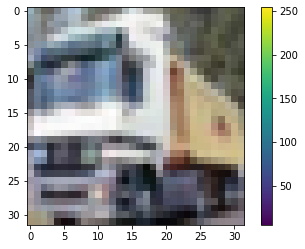

In [116]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [118]:
#Como pide el ejercicio, se pasan las imagenes rgb a binary black & white.
print(train_images.shape)
train_images_bin = tf.image.rgb_to_grayscale(train_images)
train_images_bin.shape

(50000, 32, 32, 3)


TensorShape([50000, 32, 32, 1])

In [133]:
#También test
print(test_images.shape)
test_images_bin = tf.image.rgb_to_grayscale(test_images)
test_images_bin.shape

(10000, 32, 32, 3)


TensorShape([10000, 32, 32, 1])

In [120]:
class_names = np.array(uniques)

C:\Users\Adrià\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


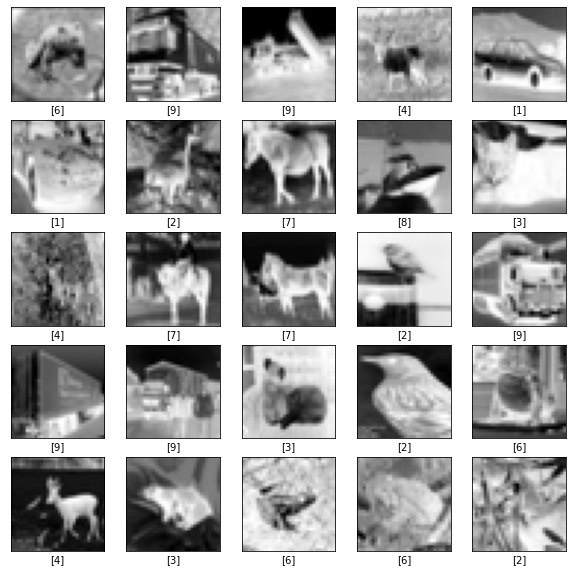

In [121]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_bin[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [124]:
model_1 = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [126]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
__________________________________________________

In [125]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [129]:
#Asignamos los parámetros de compilación del modelo.
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
model_1.fit(train_images_bin, train_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8911 - accuracy: 0.3265
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6062 - accuracy: 0.4386
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4869 - accuracy: 0.4845
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4112 - accuracy: 0.5089
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3575 - accuracy: 0.5311
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3140 - accuracy: 0.5447
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2836 - accuracy: 0.5540
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2470 - accuracy: 0.5648
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2270 - accuracy: 0.5733
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.208

In [131]:
model_2.fit(train_images_bin, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.0989
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1722 - accuracy: 0.1646
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6501 - accuracy: 0.4069
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5250 - accuracy: 0.4590
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4519 - accuracy: 0.4868
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4005 - accuracy: 0.5084
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3621 - accuracy: 0.5227
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3322 - accuracy: 0.5337
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3043 - accuracy: 0.5424
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.285

In [134]:
test_loss_1, test_acc_1 = model_1.evaluate(test_images_bin,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_1)

313/313 - 1s - loss: 1.3134 - accuracy: 0.5378

Test accuracy: 0.5378000140190125


In [135]:
test_loss_2, test_acc_2 = model_2.evaluate(test_images_bin,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_2)

313/313 - 1s - loss: 1.3071 - accuracy: 0.5415

Test accuracy: 0.5414999723434448


In [ ]:
#El segundo, que tiene una capa más, tiene mejor resultado.

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [ ]:
#Primero tenemos que ajustar el modelo a colores rgb, ya que el anterior está adaptado para imágenes en blanco y negro.

In [140]:
model_1_c = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [141]:
model_2_c = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [142]:
model_1_c.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2_c.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [143]:
model_1_c.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6556 - accuracy: 0.4125
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3889 - accuracy: 0.5117
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2846 - accuracy: 0.5494
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2166 - accuracy: 0.5725
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1665 - accuracy: 0.5924
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1296 - accuracy: 0.6033
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0974 - accuracy: 0.6151
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0755 - accuracy: 0.6220
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0504 - accuracy: 0.6295
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.032

In [144]:
model_2_c.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7149 - accuracy: 0.3735
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4814 - accuracy: 0.4710
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3952 - accuracy: 0.5018
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3373 - accuracy: 0.5262
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2961 - accuracy: 0.5391
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2656 - accuracy: 0.5489
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2418 - accuracy: 0.5595
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2167 - accuracy: 0.5682
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1954 - accuracy: 0.5770
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.180

In [145]:
test_loss_1_c, test_acc_1_c = model_1_c.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_1_c)

313/313 - 1s - loss: 1.1210 - accuracy: 0.6099

Test accuracy: 0.6098999977111816


In [146]:
test_loss_2_c, test_acc_2_c = model_2_c.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_2_c)

313/313 - 1s - loss: 1.2112 - accuracy: 0.5703

Test accuracy: 0.5702999830245972


In [ ]:
#Para 10 épocas, con imagenes a color, el resultado es mejor. E incluso es también mejor con la red neuronal 1, a diferencia del caso tratado con gama cromática de blanco y negro.